In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [46]:
url = "http://dmontero.org/mineria/datasets/TransbordadorEspacial.csv"
df = pd.read_csv(url, sep = ";", decimal=",")
df.head()

,flight,date,fail.field,fail.nozzle,temp
0,1,12/04/81,0,0,18.9
1,2,12/11/81,1,0,21.1
2,3,22/03/82,0,0,20.6
3,5,11/11/82,0,0,20.0
4,6,04/04/83,0,1,19.4


In [47]:
# Calcular la probabilidad de un incidente con los datos que se tienen

casos_favorables = df["fail.field"].sum()
casos_totales = df.shape[0]
probabilidad_incidente = casos_favorables / casos_totales
probabilidad_incidente

0.30434782608695654

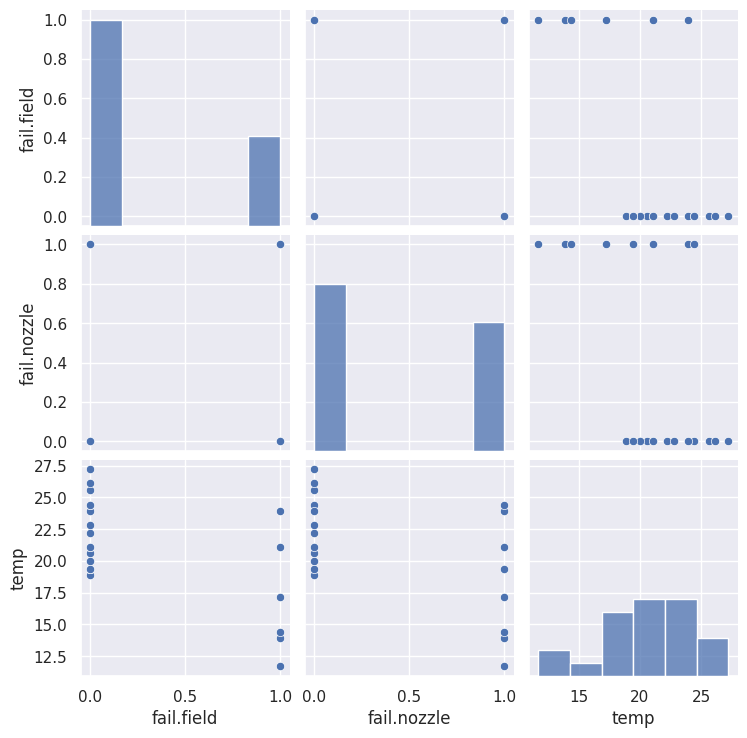

In [48]:
# Me gustaria calcular la probabilidad de que haya un incidente dado que la temperatura en la mañana del desepegue del challenger era de 2 celcius
# Las funciones de probabilidad tiene una forma
sns.pairplot(df)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
y = df["fail.field"]
X = df["temp"]
# solo porque no tiene el tipo correcto
X = np.array(X).reshape(-1,1)
modelo = LogisticRegression()
modelo.fit(X,y)


LogisticRegression()

In [51]:
# ahora quiero hacer la prediccion par ala mañana deñl lanzamiento del challenger
temp_challenger = [[2.0]] # habia 2 celcius esa mañana
prediccion = modelo.predict(temp_challenger)
prediccion_probabilidad = modelo.predict_proba(temp_challenger)
prediccion, prediccion_probabilidad

(array([1]), array([[0.00152143, 0.99847857]]))